In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
def describe_tensor(t):
    """
    Describes a few basic elements about any torch.Tensor.
    Prints out shape, number of elements, and rank.
    """
    print(f"Shape (Tensor.shape): {t.shape}")
    print(f"Number of elements (Tensor.numel()): {t.numel()}")
    print(f"Number of dimensions, or rank + 1 (Tensor.ndim): {t.ndim}")
    print(f"Tensor type (Tensor.dtype): {t.dtype}")

In [3]:
rank0tensor = torch.tensor(1)
rank0tensor

tensor(1)

In [4]:
describe_tensor(rank0tensor)

Shape (Tensor.shape): torch.Size([])
Number of elements (Tensor.numel()): 1
Number of dimensions, or rank + 1 (Tensor.ndim): 0
Tensor type (Tensor.dtype): torch.int64


In [5]:
rank1tensor = torch.tensor([1.,2,3])
rank1tensor

tensor([1., 2., 3.])

In [6]:
describe_tensor(rank1tensor)

Shape (Tensor.shape): torch.Size([3])
Number of elements (Tensor.numel()): 3
Number of dimensions, or rank + 1 (Tensor.ndim): 1
Tensor type (Tensor.dtype): torch.float32


In [7]:
rank2tensor = torch.tensor(
    [
     [1.,2,3],
     [4,5,6],
     [7,8,9]
    ]
)
rank2tensor

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [8]:
describe_tensor(rank2tensor)

Shape (Tensor.shape): torch.Size([3, 3])
Number of elements (Tensor.numel()): 9
Number of dimensions, or rank + 1 (Tensor.ndim): 2
Tensor type (Tensor.dtype): torch.float32


In [9]:
rank3tensor = torch.rand(3, 3, 3)
rank3tensor

tensor([[[0.0712, 0.1409, 0.4864],
         [0.1888, 0.7116, 0.2082],
         [0.5569, 0.7603, 0.6068]],

        [[0.4351, 0.6399, 0.9933],
         [0.8454, 0.4870, 0.2509],
         [0.9519, 0.7376, 0.7208]],

        [[0.7316, 0.9466, 0.5627],
         [0.5643, 0.9673, 0.9188],
         [0.9194, 0.2633, 0.9670]]])

In [10]:
describe_tensor(rank3tensor)

Shape (Tensor.shape): torch.Size([3, 3, 3])
Number of elements (Tensor.numel()): 27
Number of dimensions, or rank + 1 (Tensor.ndim): 3
Tensor type (Tensor.dtype): torch.float32


In [11]:
# We won't try to visualize this tensor since it doesn't fit neatly into my brain.
# This is just to show we can make big tensors, even if we don't have a practical use for them.
n_dim = 10
describe_tensor(torch.randn(*(tuple([3] * n_dim))))

Shape (Tensor.shape): torch.Size([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Number of elements (Tensor.numel()): 59049
Number of dimensions, or rank + 1 (Tensor.ndim): 10
Tensor type (Tensor.dtype): torch.float32


# Exercise 3.1: Torch `dtype`s

Read through the [documentation](https://pytorch.org/docs/stable/tensor_attributes.html#torch-dtype) on different tensor types.

Create a function that uses the [`Tensor.element_size()`](https://pytorch.org/docs/stable/generated/torch.Tensor.element_size.html#) and `Tensor.numel()` methods to calculate the memory footprint of a tensor in megabytes.
There are 1e6 bytes in a megabyte.
Then, create at least 3 tensors with the same shape but different `dtype`s like `torch.float16` and `torch.float32`.
What's the difference in the memory footprints of the following tensors?

<!-- startquestion -->


In [22]:
def memory_footprint(tensor):
    mb = tensor.element_size() * tensor.numel() / 1e6
    return mb
    raise NotImplementedError('Implement this function!')

In [23]:
tensors = [
    torch.tensor(100, dtype=torch.float16),
    torch.tensor(100, dtype=torch.float32),
    torch.tensor(100, dtype=torch.int32),
    torch.tensor(100, dtype=torch.long) # I think this is int64
]

for t in tensors:
    print(f"""
    Tensor:
    {t}
    dtype: {t.dtype}
    memory footprint (MB): {memory_footprint(t)}
    ----------------
    """)


    Tensor:
    100.0
    dtype: torch.float16
    memory footprint (MB): 2e-06
    ----------------
    

    Tensor:
    100.0
    dtype: torch.float32
    memory footprint (MB): 4e-06
    ----------------
    

    Tensor:
    100
    dtype: torch.int32
    memory footprint (MB): 4e-06
    ----------------
    

    Tensor:
    100
    dtype: torch.int64
    memory footprint (MB): 8e-06
    ----------------
    


In [4]:
x = torch.ones(4).float()
x

tensor([1., 1., 1., 1.])

In [6]:
x * 4

tensor([4., 4., 4., 4.])

In [7]:
x + 4

tensor([5., 5., 5., 5.])

In [8]:
x - 2

tensor([-1., -1., -1., -1.])

In [9]:
x / 4

tensor([0.2500, 0.2500, 0.2500, 0.2500])

In [10]:
# create two random tensors of the same shape, x and y
x = torch.rand(2,2)
y = torch.rand(2,2)
x, y

(tensor([[0.4348, 0.6784],
         [0.2328, 0.9445]]),
 tensor([[0.3983, 0.1650],
         [0.0366, 0.3313]]))

In [11]:
x + y

tensor([[0.8332, 0.8434],
        [0.2694, 1.2758]])

In [12]:
x - y

tensor([[0.0365, 0.5135],
        [0.1962, 0.6131]])

In [13]:
x * y

tensor([[0.1732, 0.1119],
        [0.0085, 0.3129]])

In [14]:
x / y

tensor([[1.0916, 4.1128],
        [6.3591, 2.8504]])

Broadcasting with Python

In [18]:
x = torch.rand(2, 4)
y = torch.rand(4)
x, y

(tensor([[0.9047, 0.7102, 0.7551, 0.9596],
         [0.0233, 0.7781, 0.3278, 0.8863]]),
 tensor([0.9229, 0.7613, 0.6774, 0.7097]))

In [19]:
torch.stack([x[0] * y, x[1] * y])

tensor([[0.8350, 0.5407, 0.5115, 0.6810],
        [0.0215, 0.5923, 0.2220, 0.6290]])

In [20]:
x * y

tensor([[0.8350, 0.5407, 0.5115, 0.6810],
        [0.0215, 0.5923, 0.2220, 0.6290]])

In [21]:
x = torch.rand(3, 2, 4)
x

tensor([[[0.7203, 0.9085, 0.7096, 0.3399],
         [0.4427, 0.9881, 0.0879, 0.9817]],

        [[0.5326, 0.1883, 0.6197, 0.0905],
         [0.4888, 0.8840, 0.6973, 0.8089]],

        [[0.8519, 0.4956, 0.9084, 0.2208],
         [0.0403, 0.7031, 0.6138, 0.6447]]])

In [22]:
torch.stack([torch.stack([i * y for i in a]) for a in x])

tensor([[[0.6647, 0.6917, 0.4807, 0.2412],
         [0.4086, 0.7522, 0.0596, 0.6967]],

        [[0.4916, 0.1433, 0.4198, 0.0642],
         [0.4512, 0.6730, 0.4723, 0.5741]],

        [[0.7862, 0.3773, 0.6154, 0.1567],
         [0.0371, 0.5353, 0.4158, 0.4575]]])

In [24]:
x * y

tensor([[[0.6647, 0.6917, 0.4807, 0.2412],
         [0.4086, 0.7522, 0.0596, 0.6967]],

        [[0.4916, 0.1433, 0.4198, 0.0642],
         [0.4512, 0.6730, 0.4723, 0.5741]],

        [[0.7862, 0.3773, 0.6154, 0.1567],
         [0.0371, 0.5353, 0.4158, 0.4575]]])

Multiplication Examples

In [26]:
x = torch.tensor([1, 2, 3, 4])
y = torch.tensor([2, 3, 4, 5])

In [27]:
# Let's do this using element-wise operations
(x * y).sum()

tensor(40)

In [28]:
# torch.matmul does matrix multiplication.
torch.matmul(x, y)

tensor(40)

In [29]:
# @ is shorthand for matrix multiplication as well.
x@y

tensor(40)

In [30]:
y@x

tensor(40)

In [31]:
assert x@y == y@x == torch.matmul(x,y) == (x * y).sum()

In [32]:
X = torch.tensor([[1, 2], [3, 4]])
Y = torch.tensor([[2, 3, 4], [5, 6, 7]])

In [33]:
X@Y

tensor([[12, 15, 18],
        [26, 33, 40]])

In [34]:
(torch.randn(16, 3, 3, 3) @ torch.randn(3, 3, 12)).shape

torch.Size([16, 3, 3, 12])

# Exercise 3.2: matrix multiplication

Previously, we tried to multiply `X@Y`.
Will `Y@X` work?
Why or why not?

In the cell below, define `B`  using `torch.rand` so that `A@B` returns a tensor with shape (4, 7).

<!-- startquestion -->

In [2]:
A = torch.rand(4, 2)
B = torch.rand(2, 7)

In [3]:
if not isinstance(B, type(...)):
    assert (A@B).shape == (4, 7)
else:
    print('Please define B such that (A@B).shape = (4, 7)')

In [4]:
X = torch.tensor(list(range(27))).reshape(3,3,3)
X

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [5]:
X.sum()

tensor(351)

In [6]:
# Change the dim parameter to see how the results change
X.sum(dim=0)

tensor([[27, 30, 33],
        [36, 39, 42],
        [45, 48, 51]])

In [10]:
# Create a vector
X = torch.arange(0, 3*3*3)
X

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26])

In [11]:
# Reshape it into a 3x3x3 to be "image-like"
X = X.reshape(3, 3, 3)
X

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [12]:
# How do we add a "batch_dim"?
# Unsqueeze addes an empty dimension
# Squeeze takes away empty dimensions
X.shape, X.unsqueeze(0).shape

(torch.Size([3, 3, 3]), torch.Size([1, 3, 3, 3]))

In [13]:
# Use unsqueeze to create a "batch"
torch.cat([X.unsqueeze(0), X.unsqueeze(0)]).shape

torch.Size([2, 3, 3, 3])

In [14]:
y = torch.randn(1, 1, 1, 1, 1, 1, 8)
y, y.shape, y.squeeze(), y.squeeze().shape, y.squeeze(2).shape

(tensor([[[[[[[ 0.2693, -1.1868,  0.3426,  0.7029,  0.3455, -0.7369, -1.6634,
               -0.2377]]]]]]]),
 torch.Size([1, 1, 1, 1, 1, 1, 8]),
 tensor([ 0.2693, -1.1868,  0.3426,  0.7029,  0.3455, -0.7369, -1.6634, -0.2377]),
 torch.Size([8]),
 torch.Size([1, 1, 1, 1, 1, 8]))

In [15]:
# squeeze and unsqueeze are opposites
assert X.shape == X.unsqueeze(0).squeeze(0).shape

In [16]:
# Swap the 1nd and 2rd dim
X.permute(0, 2, 1)

tensor([[[ 0,  3,  6],
         [ 1,  4,  7],
         [ 2,  5,  8]],

        [[ 9, 12, 15],
         [10, 13, 16],
         [11, 14, 17]],

        [[18, 21, 24],
         [19, 22, 25],
         [20, 23, 26]]])

# Exercise 3.3: Write your own `sigmoid` function

The `softmax` function is given.
Use a similar approach to complete the `sigmoid` function.
$e^x$ in `torch` is expressed using `torch.exp(x)`.

<!-- startquestion -->

In [2]:
def sigmoid(x):
    return (torch.exp(x)/(1 + torch.exp(x)))

def softmax(x, dim):
    return torch.exp(x)/torch.exp(x).sum(dim=dim)

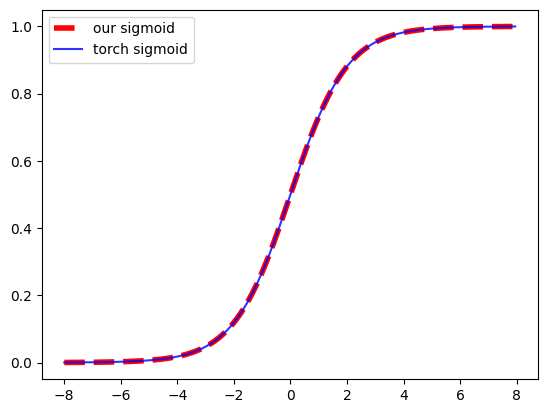

In [3]:
x = torch.arange(-8, 8, 0.05)
plt.plot(x, sigmoid(x), label='our sigmoid', ls='--', color='r', linewidth=4)
plt.plot(x, torch.sigmoid(x), label='torch sigmoid', c='b', alpha=0.8)
plt.legend()

In [4]:
X = torch.rand(3, 3)
print(
    'X:', X,
    'Our softmax(x):', softmax(X, dim=0),
    'Torch softmax(x):', torch.softmax(X, dim=0),
    'Sanity check: row sums:', softmax(X, dim=0).sum(dim=0),
    sep='\n'
)

X:
tensor([[0.0961, 0.8231, 0.6395],
        [0.7587, 0.0204, 0.6594],
        [0.4484, 0.3954, 0.8505]])
Our softmax(x):
tensor([[0.2292, 0.4762, 0.3072],
        [0.4447, 0.2134, 0.3134],
        [0.3261, 0.3105, 0.3794]])
Torch softmax(x):
tensor([[0.2292, 0.4762, 0.3072],
        [0.4447, 0.2134, 0.3134],
        [0.3261, 0.3105, 0.3794]])
Sanity check: row sums:
tensor([1.0000, 1.0000, 1.0000])


In [5]:
# We can also call softmax on a tensor
X.softmax(dim=0)

tensor([[0.2292, 0.4762, 0.3072],
        [0.4447, 0.2134, 0.3134],
        [0.3261, 0.3105, 0.3794]])

In [6]:
(torch.randn(16, 3, 4) * torch.randn(3, 4)).shape

torch.Size([16, 3, 4])

In [10]:
(torch.randn(16, 3, 4) @ torch.randn(4, 3)).shape

RuntimeError: mat1 and mat2 shapes cannot be multiplied (48x4 and 3x4)

In [8]:
(torch.randn(16, 3, 4) @ torch.randn(4, 7)).shape

torch.Size([16, 3, 7])

In [11]:
torch.randn(3, 4) * torch.randn(4, 3)

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 1

In [ ]:
torch.randn(3, 4) @ torch.randn(4, 3)